Explicación del modelo
--

La regla de la mayoria es un modelo de opinion que describe,como un sujeto decide modificar o mantener su opinion en funcion de la cantidad de personas a favor o en contra de un determinada idea.

En un instante de tiempo $t$ se verifica el número de individuos a favor de la propuesta que es denotado por $N_{+}$ y el número de individuos en contra, denotado por $N_{-}$, donde se cumple que el número total de individuos es igual a:

$N_{+} + N_{-} = N$

Al normalizar, podemos escribir la probabilidad de estar a favor$P_{+}$ o en contra$P_{-}$ como:

$P_{+} + P_{-} = 1$, donde $P_{\pm} = \frac{N_{\pm}}{N}$

De esta forma, el modelo contempla un número N de individuos los cuales se subdividen en grupos de tamaño L, el tamaño L del grupo además tiene una probabilidad $a_n$ de conformarse, la ecuacion que describe la dinámica de opinion de este sistema es la siguiente:

$$
P_{+} (t+1) = \sum_{k=1}^{L} a_{k} \sum_{j=N[\frac{k}{2}+1]}^{k} C_{j}^{k} P_{+}^{j}(t) P_{-}^{(k-j)}(t)
$$

Donde $C_{j}^{k} = \frac{k!}{(k-j)! j!}$

Instrucciones de la simulación
--

1. La primera celda contiene 2 arrays con los valores y tamaño que indica el paper
2. En la segunda celda se define la función que calcula la probabilidad de estar a favor para un tiempo $t+1$, osea $P_{+} (t+1)$. Esta función recibe dos parametros el array con la probabilidad $a_{n}$ de conformar los grupos y $P_{0}$
3. En la tercera se recrea la figura 1 del paper, la linea sólida negra es para el array a_n3 y la linea segmentada es para el array a_n6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
a_n3 = [0.,0.1,0.9]
a_n6 = [0.2,0.2,0.2,0.2,0.1,0.1]
P0 = np.linspace(0,1,1000)
range(len(P0))

range(0, 1000)

In [44]:
def Prob(a_k,P0):
 
    P_t1_total = np.zeros((len(P0)))#arreglo donde guardar los valores de P(t+1) de la misma dimension de P0
    L = len(a_k)
    
   
    for i in range(len(P0)):
        P_t1 = 0
        for k in range(1,L+1):
            suma = 0
            for j in range(int(((k/2)+1)),k+1):
                C = (np.math.factorial(k))/((np.math.factorial(k-j)*np.math.factorial(j)))
                suma += C * (P0[i]**j) * ((1 - P0[i])**(k-j))
            P_t1 += a_k[k-1] * suma # P_{+}(t+1)
        P_t1_total[i] = P_t1
    
    return P_t1_total

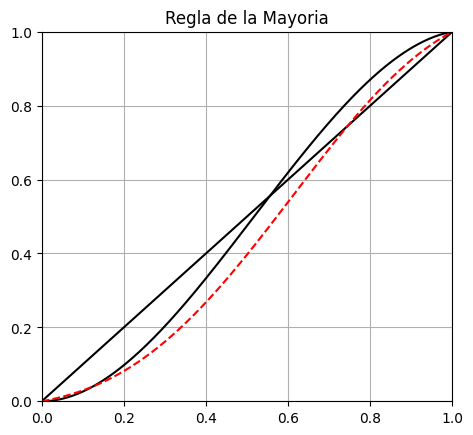

In [46]:
plt.plot(P0,P0, color='black')
plt.plot(P0,Prob(a_n3,P0), color='black')
plt.plot(P0,Prob(a_n6,P0), color='red',linestyle='--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Regla de la Mayoria')
plt.grid(True)
plt.gca().set_aspect(0.9)
plt.show()